In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#ETL
df = pd.read_csv('data/Allyears-market-region-hab-data.csv')

df.columns = df.columns.str.strip()

filtered_df = df[df['Geography'] == 'Total U.S.']

filtered_df.to_csv('data/filtered_data.csv', index=False)

In [32]:
df = pd.read_csv('/home/jovyan/479/479GroupProject-1/data/filtered_data.csv')

unit_columns = [col for col in df.columns if 'Units' in col]

stacked_df = pd.melt(df, id_vars=['Geography', 'Period'], value_vars=unit_columns,
                     var_name='Year', value_name='Units')

stacked_df['Year'] = stacked_df['Year'].str.extract('(\d+)', expand=False)

stacked_df = stacked_df.sort_values(by=['Year', 'Period'])
stacked_df 

,Geography,Period,Year,Units
0,Total U.S.,1,2020,193716227.0
1,Total U.S.,2,2020,167478433.7
2,Total U.S.,3,2020,176882274.9
3,Total U.S.,4,2020,184998785.2
4,Total U.S.,5,2020,213395671.2
5,Total U.S.,6,2020,206834060.5
6,Total U.S.,7,2020,198499962.8
7,Total U.S.,8,2020,190574137.3
8,Total U.S.,9,2020,187953345.7
9,Total U.S.,10,2020,176891861.3


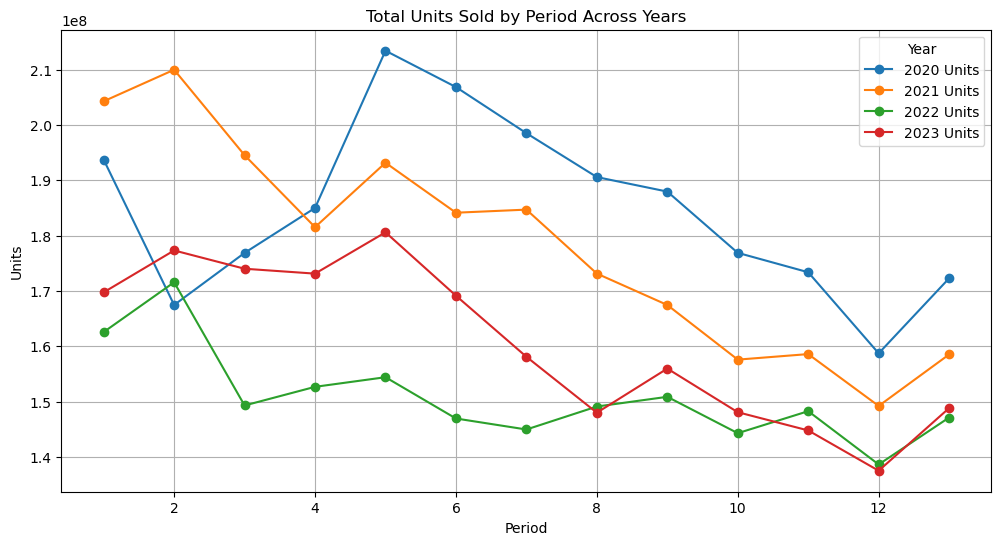

In [34]:
stacked_df.columns = stacked_df.columns.str.strip()

# Plot
plt.figure(figsize=(12, 6))

for year in stacked_df['Year'].unique():
    subset = stacked_df[stacked_df['Year'] == year]
    plt.plot(subset['Period'], subset['Units'], marker='o', label=f'{year} Units')

plt.title('Total Units Sold by Period Across Years')
plt.xlabel('Period')
plt.ylabel('Units')
plt.legend(title='Year')
plt.grid(True)
plt.show()